In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

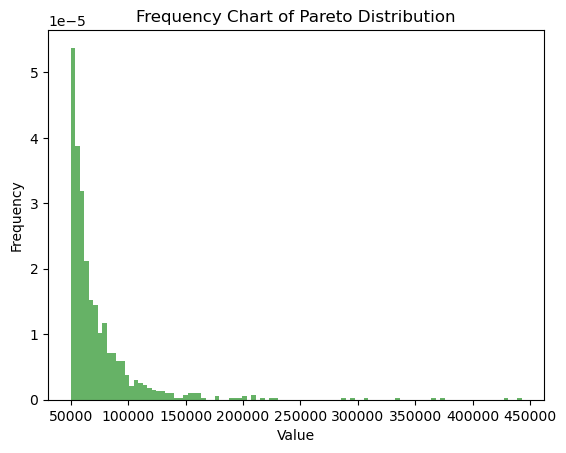

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Pareto distribution
mean = 50000  # Mean
alpha = 3     # Shape parameter

# Generate random numbers following a Pareto distribution
random_numbers = np.random.pareto(alpha, 1000) + 1
random_numbers *= mean

# Create histogram
plt.hist(random_numbers, bins=100, density=True, alpha=0.6, color='g')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Chart of Pareto Distribution')

# Show plot
plt.show()


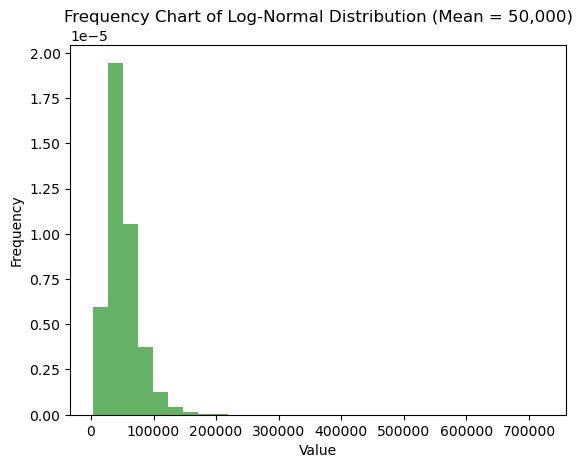

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the log-normal distribution
mean_X = 50000  # Desired mean
variance_X = 25000**2  # Desired variance (e.g., half of the mean squared)

# Calculate parameters for the log-normal distribution
mu_log = np.log(mean_X**2 / np.sqrt(mean_X**2 + variance_X))
sigma_log = np.sqrt(np.log(1 + variance_X / mean_X**2))

# Generate random numbers following a log-normal distribution
random_numbers = np.random.lognormal(mu_log, sigma_log, 27*(10**6))

# Create histogram
plt.hist(random_numbers, bins=30, density=True, alpha=0.6, color='g')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency Chart of Log-Normal Distribution (Mean = 50,000)')

# Show plot
plt.show()


In [52]:
import matplotlib.pyplot as plt

def plot_distribs(ubi_array, x=250):
    # Set the figure size
    plt.figure(figsize=(18, 6))  # Width: 12 inches, Height: 6 inches
    
    # Plot the bar chart
    for df in ubi_array:
        df = df.drop(df[df['Income Range'].str.split('-').str[-1].astype(int) > x*1000].index)
        plt.bar(range(len(df)), df["Number of People"])
        
    # Set x-tick positions to every fifth element
    plt.xticks(np.arange(0, len(df), 5))

    tick_labels = [df["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(df),5)]
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.gca().set_xticklabels(tick_labels)

    # Add labels and title
    plt.xlabel('Income Range, Thousands')
    plt.ylabel('Number of People')
    plt.title('Frequency Chart of Income Distribution')

    # Show plot
    plt.show()


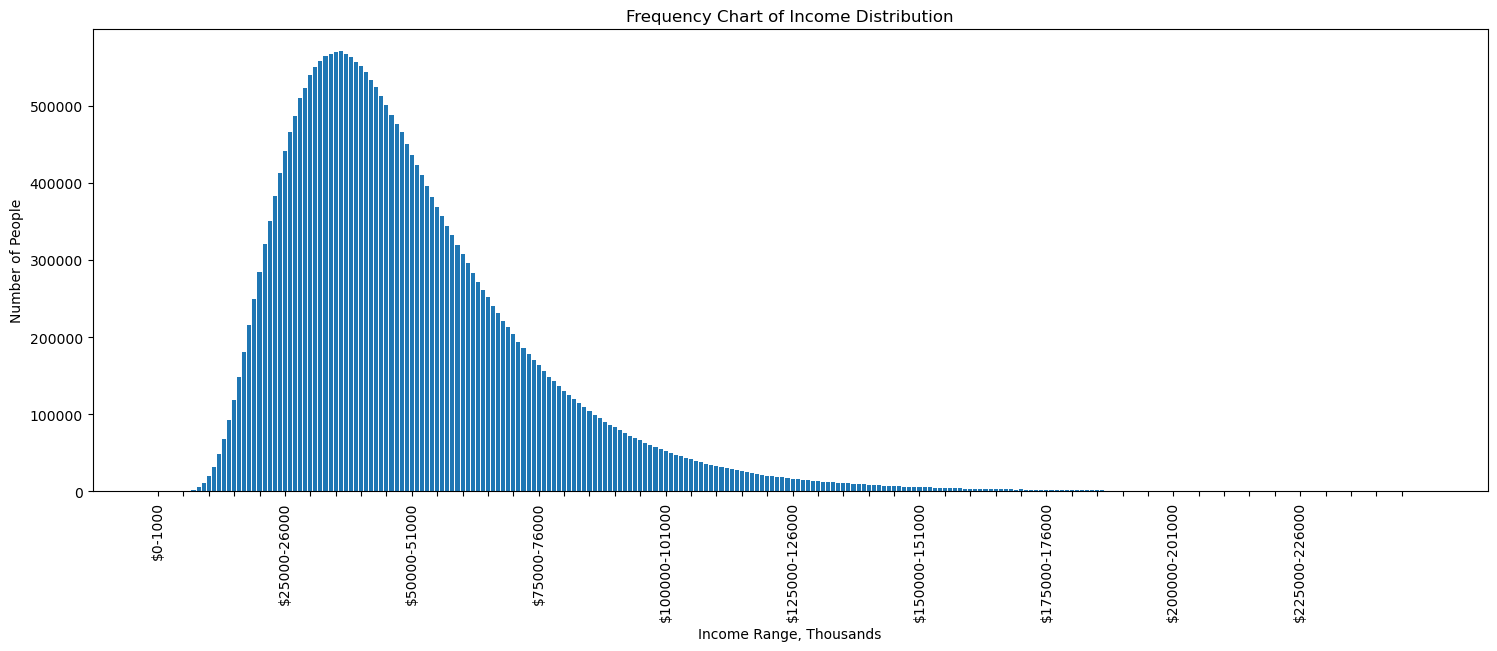

In [81]:
plot_distribs([frequency_df])

In [98]:
import numpy as np
import pandas as pd

# Desired mean and mode (peak)
mean_X = 50000  # Desired mean
mode_X = 25000  # Desired mode (peak)
pop = 27*(10**6)

# Calculate parameters for the log-normal distribution
sigma_log = np.sqrt(np.log(1 + ((mode_X / mean_X)**2)))
mu_log = np.log(mean_X) - (0.5 * sigma_log**2)

# Generate random numbers following a log-normal distribution
random_numbers = np.random.lognormal(mu_log, sigma_log, pop)

# Define income range increments
income_increments = np.arange(0, max(random_numbers) + 1000, 1000)

# Create frequency table using NumPy's histogram function
frequencies, bins = np.histogram(random_numbers, bins=income_increments)

# Create a DataFrame from the frequency table
frequency_df = pd.DataFrame({'Income Range': [f'${int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)],
                             'Number of People': frequencies})


In [26]:
len(frequency_df)

2929

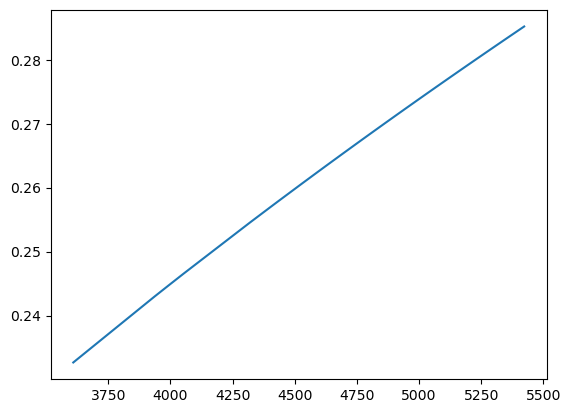

In [129]:
import numpy as np
data = gen_period_i(i=2)
def concave_function(x):
    return 1.5 * np.sqrt(x / 150000)

# Test the function with x = 0 and x = 150000
plt.plot(data['income_1'].sort_values()[:100], concave_function(data['income_1'].sort_values()[:100]))
plt.show()

In [127]:
data['income_1']

0           55147.100924
1           34118.025546
2           31377.735970
3           31283.194238
4           55226.067977
                ...     
26999995    69368.040526
26999996    46192.595944
26999997    41171.866839
26999998    27370.017491
26999999    55886.406188
Name: income_1, Length: 27000000, dtype: float64

In [131]:
data = pd.DataFrame({'income_1': random_numbers})

data['category_1'] = pd.cut(data['income_1'], bins=bins, labels=frequency_df['Income Range'])
def gen_period_i(data = data, i = 1, tax = 0.2, r = 0.2):
    for x in range(1, i, 1): 
        data['capital_' + str(x)] = concave_function(data['income_' + str(x)])*data['income_' + str(x)]
        data['inv_income_' + str(x)] = r * data['capital_' + str(x)]
        data['tax_' + str(x)] = (data['income_' + str(x)] + data['inv_income_' + str(x)])* tax
        data['ubi_amount_' + str(x)] = (0.4 * sum(data['tax_' + str(x)]))/pop
        data['net_transfer_' + str(x)] = data['ubi_amount_' + str(x)] - data['tax_' + str(x)]
        data['income_' + str(x+1)] = data['income_' + str(x)] + data['net_transfer_' + str(x)] + data['inv_income_' + str(x)]
        data['category_' + str(x+1)] = pd.cut(data['income_' + str(x+1)], bins=bins, labels=frequency_df['Income Range'])
    return data
# Display the DataFrame
data = gen_period_i(i=5)

In [114]:
def make_freq_table(i):
    ubi = data['category' + '_' + str(i)].value_counts().reset_index()
    ubi.columns = ['Income Range', 'Number of People']

    # Sort the frequency table by income range
    ubi = ubi.sort_values(by='Income Range')
    # Display the frequency table
    return(ubi)

In [115]:
for i in [1,2]:#
    print(data['category' + '_' + str(i)].value_counts().reset_index())

         category_1   count
0      $35000-36000  571056
1      $36000-37000  569202
2      $34000-35000  568964
3      $37000-38000  567789
4      $33000-34000  564549
..              ...     ...
569  $474000-475000       0
570  $475000-476000       0
571  $476000-477000       0
572  $477000-478000       0
573         $0-1000       0

[574 rows x 2 columns]
         category_2   count
0      $32000-33000  713218
1      $31000-32000  710830
2      $33000-34000  710727
3      $34000-35000  707122
4      $30000-31000  702124
..              ...     ...
569  $425000-426000       0
570  $426000-427000       0
571  $427000-428000       0
572  $428000-429000       0
573  $573000-574000       0

[574 rows x 2 columns]


In [132]:
ubi1 = make_freq_table(1)
ubi2 = make_freq_table(2)
ubi3 = make_freq_table(3)
ubi4 = make_freq_table(4)
ubi5 = make_freq_table(5)

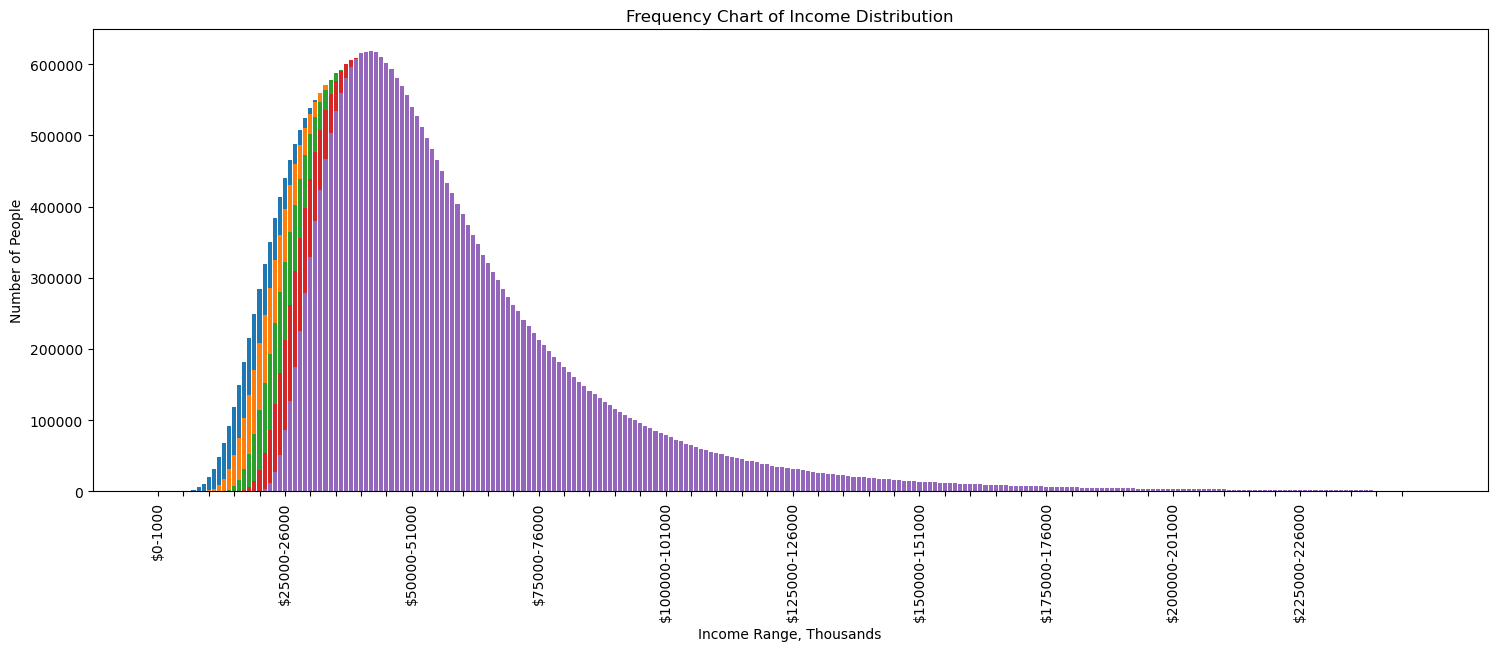

In [133]:


plot_distribs([ubi1, ubi2, ubi3, ubi4, ubi5])

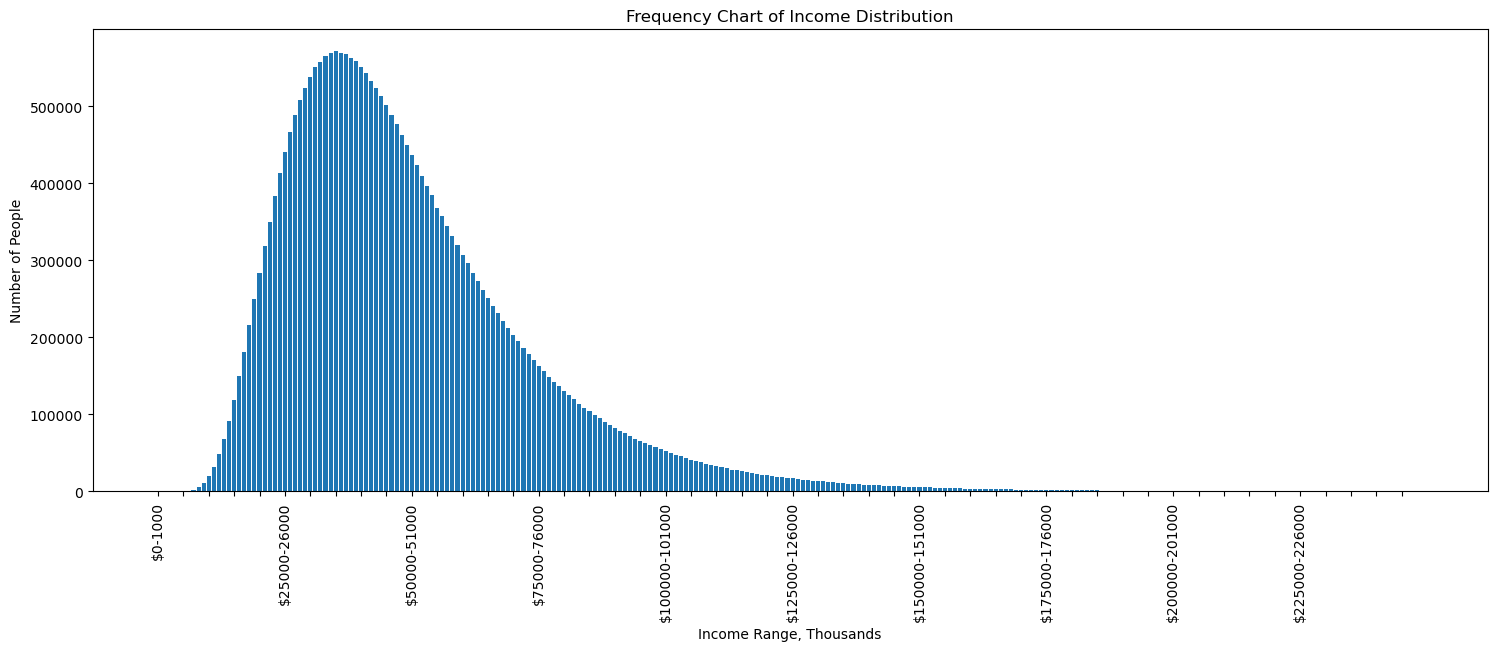

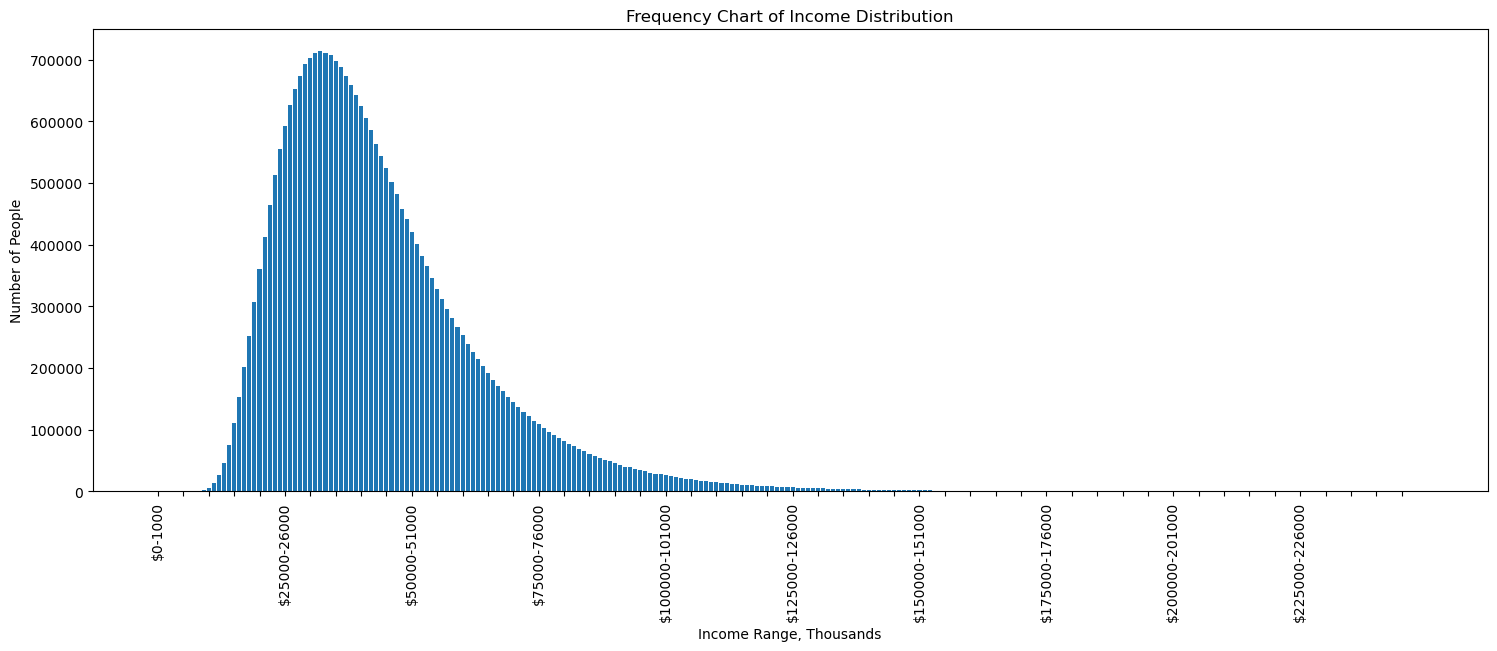

In [121]:
plot_distribs([ubi1])
plot_distribs([ubi2])